In [12]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
#loading the data set
data=pd.read_csv('Unemployment in India.csv')

In [4]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
data.shape[0]
data.shape[1]
print(f'Total no of rows:,data.shape[0]')
print(f'Total no of columns:,data.shape[1]')

Total no of rows:,data.shape[0]
Total no of columns:,data.shape[1]


In [6]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
#descriptive statistics
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
#preprocess the data
data['Date']=pd.to_datetime(data[' Date'],dayfirst=True)
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month


In [18]:
# Encode categorical variables
label_encoder= LabelEncoder()
data['Region']=label_encoder.fit_transform(data['Region'])
data['Area']=label_encoder.fit_transform(data['Area'])
data[' Frequency']=label_encoder.fit_transform(data[ ' Frequency'])

In [19]:
#checking for null values
data.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
763,False,True,False,True,True,True,False,True,True,True
764,False,True,False,True,True,True,False,True,True,True
765,False,True,False,True,True,True,False,True,True,True
766,False,True,False,True,True,True,False,True,True,True


In [20]:
data.isnull().sum()

Region                                       0
 Date                                       28
 Frequency                                   0
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                         0
Date                                        28
Year                                        28
Month                                       28
dtype: int64

In [21]:
null_values=data.isnull().sum().sum()
print(f'Total no of null values:,null_values')


Total no of null values:,null_values


In [22]:
#droping duplicate rows
data2=data.drop_duplicates()
data2

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month
0,0,31-05-2019,0,3.65,11999139.0,43.24,0,2019-05-31,2019.0,5.0
1,0,30-06-2019,0,3.05,11755881.0,42.05,0,2019-06-30,2019.0,6.0
2,0,31-07-2019,0,3.75,12086707.0,43.50,0,2019-07-31,2019.0,7.0
3,0,31-08-2019,0,3.32,12285693.0,43.97,0,2019-08-31,2019.0,8.0
4,0,30-09-2019,0,5.17,12256762.0,44.68,0,2019-09-30,2019.0,9.0
...,...,...,...,...,...,...,...,...,...,...
749,27,29-02-2020,1,7.55,10871168.0,44.09,1,2020-02-29,2020.0,2.0
750,27,31-03-2020,1,6.67,10806105.0,43.34,1,2020-03-31,2020.0,3.0
751,27,30-04-2020,1,15.63,9299466.0,41.20,1,2020-04-30,2020.0,4.0
752,27,31-05-2020,1,15.22,9240903.0,40.67,1,2020-05-31,2020.0,5.0


In [23]:
#replacing null values with 0
data3=data2.fillna(value='0')
data3

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date,Year,Month
0,0,31-05-2019,0,3.65,11999139.0,43.24,0,2019-05-31 00:00:00,2019.0,5.0
1,0,30-06-2019,0,3.05,11755881.0,42.05,0,2019-06-30 00:00:00,2019.0,6.0
2,0,31-07-2019,0,3.75,12086707.0,43.5,0,2019-07-31 00:00:00,2019.0,7.0
3,0,31-08-2019,0,3.32,12285693.0,43.97,0,2019-08-31 00:00:00,2019.0,8.0
4,0,30-09-2019,0,5.17,12256762.0,44.68,0,2019-09-30 00:00:00,2019.0,9.0
...,...,...,...,...,...,...,...,...,...,...
749,27,29-02-2020,1,7.55,10871168.0,44.09,1,2020-02-29 00:00:00,2020.0,2.0
750,27,31-03-2020,1,6.67,10806105.0,43.34,1,2020-03-31 00:00:00,2020.0,3.0
751,27,30-04-2020,1,15.63,9299466.0,41.2,1,2020-04-30 00:00:00,2020.0,4.0
752,27,31-05-2020,1,15.22,9240903.0,40.67,1,2020-05-31 00:00:00,2020.0,5.0


In [24]:
data3.describe()

,Region,Frequency,Area
count,741.000000,741.000000,741.000000
mean,13.709852,0.516869,0.516869
std,8.064321,0.502748,0.502748
min,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000
50%,14.000000,1.000000,1.000000
75%,20.000000,1.000000,1.000000
max,28.000000,2.000000,2.000000


In [31]:
#Define featutes and target variable
x=data3[['Region','Year','Month',' Frequency',' Estimated Employed','Area']]
y=data3[' Estimated Unemployment Rate (%)']

In [32]:
# split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
# Ensure that all is numerical and there are no missing values
print(x.dtypes)
print(y.dtypes)

Region                  int64
Year                   object
Month                  object
 Frequency              int64
 Estimated Employed    object
Area                    int64
dtype: object
object


In [34]:
# Train the model
model=RandomForestRegressor(n_estimators=100, random_state=44)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=44)

In [35]:
# Make predictions
y_pred=model.predict(x_test)
pd.DataFrame(y_pred)

,0
0,24.1632
1,5.0214
2,4.5090
3,6.1756
4,16.1199
...,...
144,6.3542
145,2.9993
146,27.9155
147,5.6054


In [36]:
# Evaluate the model
mse=mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error:,mse')

Mean Squared Error:,mse


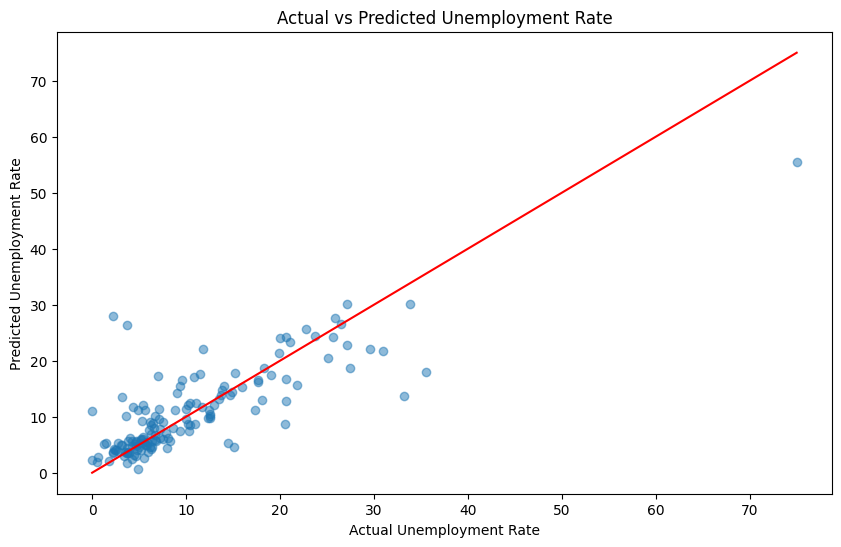

In [37]:
# Visualize the results
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate')
plt.show()


OASIS INFOBYTE
DATA SCIENCE INTERNSHIP TASK 03:
UNEMPLOYMENT RATE IN INDIA ANALYSIS WITH PYTHON
BOPANE CHAOLE